El sistema de medición de la Estación Manizales de Ecopetrol se compone de una serie de componentes clave que garantizan su funcionamiento eficiente. Este sistema incluye una válvula de corte, una válvula reguladora de presión, un sistema de filtración, un enderezador de flujo, un medidor tipo turbina, una válvula reguladora de flujo y un sistema conectado a tanques, como se detalla en el siguiente diagrama.

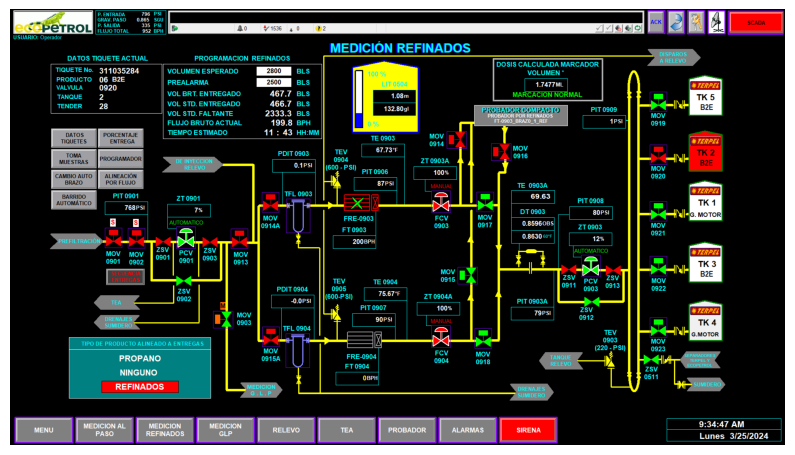

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_diagrama1 = 'Diagrama1.png'

diagrama1 = mpimg.imread(ruta_diagrama1)

plt.figure(figsize=(22, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(diagrama1)
plt.axis('off')  

plt.show()

Las características principales del sistema de medición son las siguientes:
* 	Presión de entrada: 700 psi.
*	Presión de salida: 80 psi.
*	Caudal de entrega: 200 barriles por hora. 
*	Diámetro tubería principal: 6 in. 
*	Diámetro enderezador de flujo: 3 in.
*	Diámetro turbina de medición: 3 in.
*	Longitud del enderezador de flujo: 62 in. 
*	Rugosidad tubería del enderezador de flujo 40% L según fabricante: 0.025
*	Rugosidad tubería del enderezador de flujo 60% L según fabricante: 0.15
*   Densidad de la gasolina:
*   Viscosidad dinamica de la gasolina: 

A continuación se muestra parte del sistema de medición de la Estación Manizales:

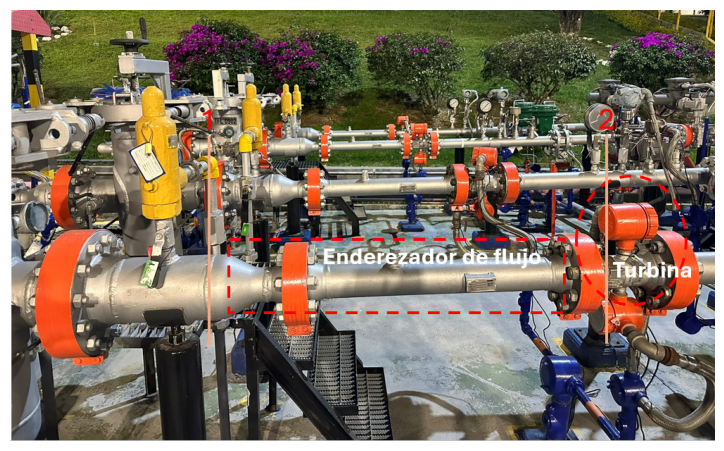

In [45]:
ruta_imagen1 = 'Imagen1.png'

imagen1 = mpimg.imread(ruta_imagen1)

plt.figure(figsize=(20, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(imagen1)
plt.axis('off')  

plt.show()

El sistema se dividirá en dos partes, el punto 1 representa la seccion de entrada al enderezador de flujo con diametro de 6 pulgadas, la seccion 2 representa la salida del enderezador de flujo a la turbina en 3 pulgadas. 
Conociendo el diametro y el caudal que está pasando por el sistema, aplicando la ecuacion de continuidad se encontrará la velocidad del flujo antes de la reduccion y el valor de Reynolds en este punto. 

Q= V/A (Ecuacion de continuidad)
donde:
Q = Caudal (m3/h)
V = Velocidad (m/s)
A = Área (m2)

Re = V*D/U (Ecuacion de Reynolds)
donde:
Re = Número de Reynolds
V = Velocidad (m/s)
D = Diametro del tubo (m)
U = Viscosidad cinemática del fluido (m2/s)

In [46]:
import math

# Datos
caudal_barriles_por_hora = 200  # barriles por hora
diametro1_pulgadas = 6  # pulgadas


diametro1_metros = diametro1_pulgadas * 0.0254  # 1 pulgada = 0.0254 metros

caudal_metros_cubicos_por_hora = caudal_barriles_por_hora * 0.1589873 # Convertir barriles por hora a metros cúbicos por hora

# Calcular el radio
radio1_metros = diametro1_metros / 2

# Calcular el área de la sección transversal de la tubería
area1_metros_cuadrados = math.pi * radio1_metros ** 2

# Calcular la velocidad del flujo en metros cúbicos por hora
velocidad_flujo1 = caudal_metros_cubicos_por_hora / area1_metros_cuadrados

# Convertir la velocidad del flujo a metros por hora

print("La velocidad del flujo en el punto 1 es:", velocidad_flujo1, "m/h")

La velocidad del flujo en el punto 1 es: 1743.141386724678 m/h


In [47]:
viscosidad_cinemática = 2.8e-6

velocidad1_metros_por_segundo = velocidad_flujo1 / 3600

# Calcular el número de Reynolds
Re1 = (velocidad1_metros_por_segundo * diametro1_metros) / viscosidad_cinemática

print("El número de Reynolds es:", Re1)

El número de Reynolds es: 26354.637632623104


Aplicando la ecuacion de continuidad encontramos que la velocidad de flujo en el punto 1 es de 1743.14 m/h o lo que sería equivalente a decir 0.4842 m/s.

Cuando el numero de Reynolds es mayor a 4000 se considera que el flujo es turbulento, en el punto 1 el flujo es turbulento y es de esperar pues es la forma habitual y deseada para transportar los hidrocarburos. 

Según el Manual de Mediición dinámica de hidrocarburos de Ecopetrol (ECP-VSM-M-001-05) establece que la longitud del enderezador de flujo debe ser como menos 10 diametros de la tubería principal, en el caso de la Estación Manizales debe tener una longitud de por lo menos 60 pulgadas, pues la tuberia es de 6 pulgadas de diametro. 

Ademas el fabricante establece que en el primero 40% de la longitud del enderezador de flujo el factor de friccion es de 0.025 y en el 60% restante será de 0.15

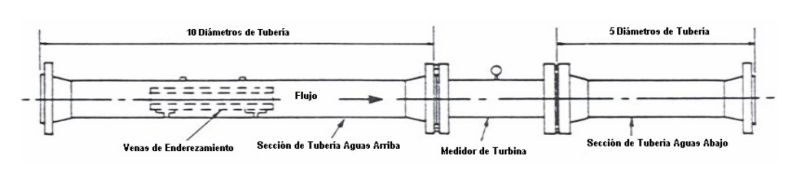

In [48]:
ruta_diagrama2 = 'Diagrama2.png'

diagrama2 = mpimg.imread(ruta_diagrama2)

plt.figure(figsize=(22, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(diagrama2)
plt.axis('off')  

plt.show()

Se propone graficar un perfil de velocidad del flujo a lo largo del enderezador de flujo, esto se hará aplicando la ecuacion de Darcy-Weisbach, esta se utiliza en la hidraulica para calcular la pérdida de carga debido a la fricción en el flujo de fluidos en tuberías. La ecuación se expresa como:

hf = (f*L*V^2)/(D*2g)
Donde: 
hf: Pérdida de carga (m).
f: Factor de fricción (adimensional).
L: Longitud de la tubería (m).
D: Diámetro de la tubería (m).
V: Velocidad del flujo (m/s).
g: Gravedad (m/s^2).

Para indicar el cambio de la velocidad del flujo con respecto a la longitud de la tuberia tomando en cuenta el factor de frinccion se propone la siguiente derivada; 

dV/dL = -(2gD/f) * V^2

La expresión representa la tasa de cambio de la velocidad del flujo (V) con respecto a una variación infinitesimal en la longitud de la tubería (L), lo que es fundamental para comprender el comportamiento del flujo en sistemas de tuberías.

Para solucionar el modelo se propone trabajar con el método de Runge Kutta que es un conjunto de técnicas numéricas utilizadas para resolver ecuaciones diferenciales ordinarias (EDOs) y ecuaciones diferenciales parciales (EDPs). Estas técnicas aproximadamente integran las ecuaciones diferenciales paso a paso, lo que las hace especialmente útiles cuando no hay solución analítica disponible o cuando la solución analítica es difícil de obtener.
El método de Runge-Kutta más comúnmente utilizado es el llamado "método de Runge-Kutta de cuarto orden", también conocido como RK4. Este método es particularmente popular debido a su buena precisión y eficiencia relativas.

La velocidad inicial para desarrollar la derivada será la que se encontró en el punto 1. 

Velocidad final: 0.4105175865391899


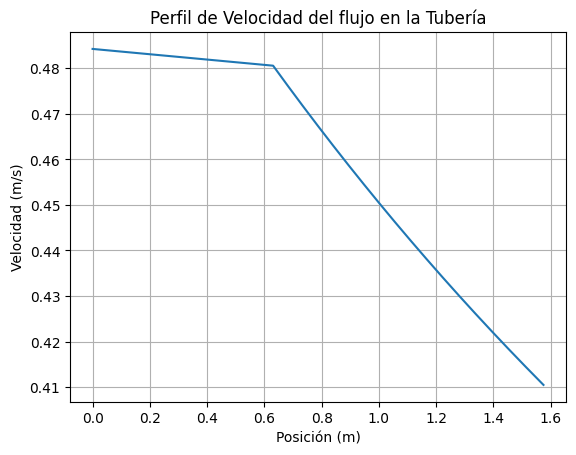

In [78]:
import numpy as np
import matplotlib.pyplot as plt

longitud_enderezador_pulgadas = 62
L = 0.0254 * longitud_enderezador_pulgadas  # Longitud del enderezador de flujo en (m)
D = 0.0254 * 2  # Diámetro de la tubería (m)
g = 9.81  # Aceleración debido a la gravedad (m/s^2)
rugosidad_normal = 0.025  # Rugosidad normal de la tubería (m)
rugosidad_aumentada = 0.375 # Rugosidad aumentada en el último 60% de la tubería (m)
V0 = velocidad1_metros_por_segundo  # Velocidad inicial en m/s

# Ecuación diferencial
def dV_dx(x, V, f):
    return -f / (2 * g * D) * V ** 2

# Método de Runge-Kutta de cuarto orden
def runge_kutta_step(x, V, f, h):
    k1 = dV_dx(x, V, f)
    k2 = dV_dx(x + h / 2, V + h / 2 * k1, f)
    k3 = dV_dx(x + h / 2, V + h / 2 * k2, f)
    k4 = dV_dx(x + h, V + h * k3, f)
    return V + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Condiciones iniciales
x_values = np.linspace(0, L, 1000)  # Posiciones a lo largo de la tubería

# Determinar dónde comienza la rugosidad aumentada
posicion_inicio_rugosidad_aumentada = int(0.4 * len(x_values))

# Lista para almacenar los valores de la velocidad
V_values = [V0]

# Resolución de la ecuación diferencial usando Runge-Kutta
h = L / len(x_values)  # Tamaño del paso
for i, x in enumerate(x_values[:-1]):
    if i >= posicion_inicio_rugosidad_aumentada:
        f_actual = rugosidad_aumentada
    else:
        f_actual = rugosidad_normal

    V_next = runge_kutta_step(x, V_values[-1], f_actual, h)
    V_values.append(V_next)

# Imprimir la velocidad final
print("Velocidad final:", V_values[-1])
velocidad2_metros_por_segundo = V_values[-1]

# Visualización de los resultados
plt.plot(x_values, V_values)
plt.xlabel('Posición (m)')
plt.ylabel('Velocidad (m/s)')
plt.title('Perfil de Velocidad del flujo en la Tubería')
plt.grid(True)
plt.show()

Lo siguiente es calcular el numero de Reynolds para el punto 2 y comprobar el regimen de flujo, aunque el fabricante no lo especifique se indicará que los accesorios del enderezador de flujo reducirán en un 20% el area de la tuberia de 2 pulgadas. 

In [82]:
diametro2_metros = 0.0254 * 2 * 0.8

# Calcular el número de Reynolds
Re2 = (velocidad2_metros_por_segundo * diametro2_metros) / viscosidad_cinemática

print("El número de Reynolds es:", Re2)

El número de Reynolds es: 5958.369541768814


El numero de Reynolds en el punto 2 es de 5958.36 que es menor respecto al valor calculado para el punto 1, se puede decir entonces que el flujo es menos turbulento en el punto 2 respecto al punto 1.

Aunque no se considera un flujo laminar pues es mayor de 2000 si se puede afirmar que el flujo en el punto 2 tendrá una mejor distribución uniforme del flujo que afectará positivamente la medicion en la turbina que si hubiera entrado a la turbina sin el enderezador de flujo. 

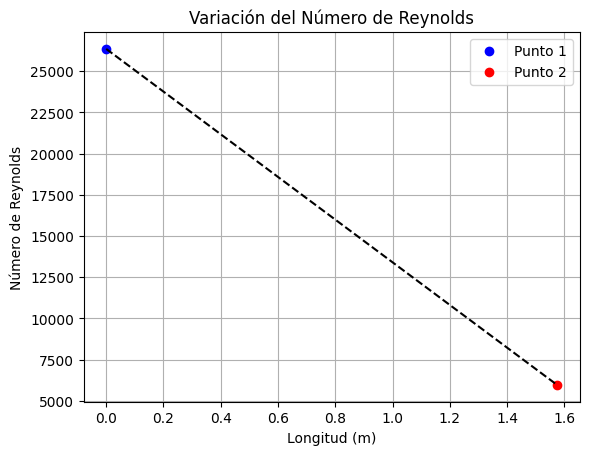

In [95]:
import matplotlib.pyplot as plt

x1, y1 = 0, Re1
x2, y2 = 0.0254 * 62, Re2  

plt.plot(x1, y1, 'bo', label='Punto 1')
plt.plot(x2, y2, 'ro', label='Punto 2')

plt.plot([x1, x2], [y1, y2], 'k--')

plt.xlabel('Longitud (m)')
plt.ylabel('Número de Reynolds')
plt.title('Variación del Número de Reynolds')
plt.legend()

plt.grid(True)
plt.show()

In [97]:
import numpy as np

# Datos del problema
longitudes_pulgadas = [62, 72, 82, 92, 102]  # Longitudes de la tubería en pulgadas
L_metros = [0.0254 * l for l in longitudes_pulgadas]  # Convertir a metros

# Velocidad final y número de Reynolds para la longitud original de la tubería
velocidad_final_original = 0.4105175865391899
Re_original = 5958.369541768814

# Calcula las velocidades finales para diferentes longitudes de tubería
velocidades_finales = [velocidad_final_original * (L / L_metros[0])**(-0.25) for L in L_metros]

# Imprimir los resultados
print("Tabla de Velocidades Finales para Diferentes Longitudes de Tubería:")
print("-------------------------------------------------------------------")
print("| Longitud (in) | Longitud (m) | Velocidad Final (m/s) |")
print("-------------------------------------------------------------------")
for i in range(len(longitudes_pulgadas)):
    print(f"| {longitudes_pulgadas[i]:^14} | {L_metros[i]:^13.4f} | {velocidades_finales[i]:^21.4f} |")
print("-------------------------------------------------------------------")


Tabla de Velocidades Finales para Diferentes Longitudes de Tubería:
-------------------------------------------------------------------
| Longitud (in) | Longitud (m) | Velocidad Final (m/s) |
-------------------------------------------------------------------
|       62       |    1.5748     |        0.4105         |
|       72       |    1.8288     |        0.3955         |
|       82       |    2.0828     |        0.3828         |
|       92       |    2.3368     |        0.3719         |
|      102       |    2.5908     |        0.3625         |
-------------------------------------------------------------------


In [103]:
import numpy as np

# Datos del problema
longitudes_pulgadas = [62, 92, 122, 152, 182]  # Longitudes de la tubería en pulgadas
L_metros = [0.0254 * l for l in longitudes_pulgadas]  # Convertir a metros
diametro_pulgadas = 2 *0.8 # Diámetro de la tubería en pulgadas
D_tuberia = 0.0254 * diametro_pulgadas  # Convertir a metros
viscosidad_cinematica = 2.8e-6  # Viscosidad cinemática del fluido en m^2/s

# Velocidad final para la longitud original de la tubería
velocidad_final_original = 0.4105175865391899

# Calcula las velocidades finales y números de Reynolds para diferentes longitudes de tubería
datos_tabla = []
for longitud_pulgadas in longitudes_pulgadas:
    longitud_metros = 0.0254 * longitud_pulgadas
    velocidad_final = velocidad_final_original * (longitud_metros / L_metros[0])**(-0.25)
    numero_reynolds = (velocidad_final * D_tuberia) / viscosidad_cinematica
    datos_tabla.append((longitud_pulgadas, longitud_metros, velocidad_final, numero_reynolds))

# Imprimir los resultados en forma de tabla
print("Tabla de Resultados:")
print("------------------------------------------------------------------------")
print("| Longitud (in) | Longitud (m) | Velocidad Final (m/s) | Número de Reynolds |")
print("------------------------------------------------------------------------")
for longitud_pulgadas, longitud_metros, velocidad_final, numero_reynolds in datos_tabla:
    print(f"| {longitud_pulgadas:^14} | {longitud_metros:^13.4f} | {velocidad_final:^21.4f} | {numero_reynolds:^18.4f} |")
print("------------------------------------------------------------------------")

Tabla de Resultados:
------------------------------------------------------------------------
| Longitud (in) | Longitud (m) | Velocidad Final (m/s) | Número de Reynolds |
------------------------------------------------------------------------
|       62       |    1.5748     |        0.4105         |     5958.3695      |
|       92       |    2.3368     |        0.3719         |     5398.5658      |
|      122       |    3.0988     |        0.3466         |     5030.7809      |
|      152       |    3.8608     |        0.3281         |     4761.7266      |
|      182       |    4.6228     |        0.3136         |     4552.0551      |
------------------------------------------------------------------------


In [117]:
import numpy as np

# Datos de la tabla
longitudes_pulgadas = np.array([62, 92, 122, 152, 182])  # Longitudes de la tubería en pulgadas
longitudes_metros = np.array([1.5748, 2.3368, 3.0988, 3.8608, 4.6228])  # Longitudes de la tubería en metros
velocidades_finales = np.array([0.4105, 0.3719, 0.3466, 0.3281, 0.3136])  # Velocidades finales en m/s

# Función de interpolación de Lagrange para encontrar la velocidad final interpolada
def interpolacion_lagrange(longitud_interes):
    L = len(longitudes_pulgadas)
    velocidad_final_interpolada = 0
    for i in range(L):
        term = velocidades_finales[i]
        for j in range(L):
            if j != i:
                term *= (longitud_interes - longitudes_pulgadas[j]) / (longitudes_pulgadas[i] - longitudes_pulgadas[j])
        velocidad_final_interpolada += term
    return velocidad_final_interpolada

# Función para calcular el número de Reynolds dado la velocidad final y la longitud de la tubería
def calcular_reynolds(velocidad_final, longitud):
    diametro_pulgadas = 2 * 0.8  # Diámetro de la tubería en pulgadas (ajustado)
    D_tuberia = 0.0254 * diametro_pulgadas  # Convertir a metros
    viscosidad_cinematica = 2.8e-6  # Viscosidad cinemática del fluido en m^2/s
    return (velocidad_final * D_tuberia) / viscosidad_cinematica

# Longitud de interés
longitud_interes = 130  # Longitud de interés en pulgadas

# Interpolación de Lagrange para encontrar la velocidad final
velocidad_final_interpolada = interpolacion_lagrange(longitud_interes)
print(f"Para una longitud de {longitud_interes} pulgadas, la velocidad final interpolada es: {velocidad_final_interpolada:.4f} m/s")

# Calcular el número de Reynolds correspondiente
reynolds_interpolado = calcular_reynolds(velocidad_final_interpolada, longitud_interes)
print(f"El número de Reynolds interpolado es: {reynolds_interpolado:.4f}")

Para una longitud de 130 pulgadas, la velocidad final interpolada es: 0.3412 m/s
El número de Reynolds interpolado es: 4952.0357
